In [132]:
import numpy as np
import pandas as pd
from sklearn import linear_model

%pylab inline

Populating the interactive namespace from numpy and matplotlib


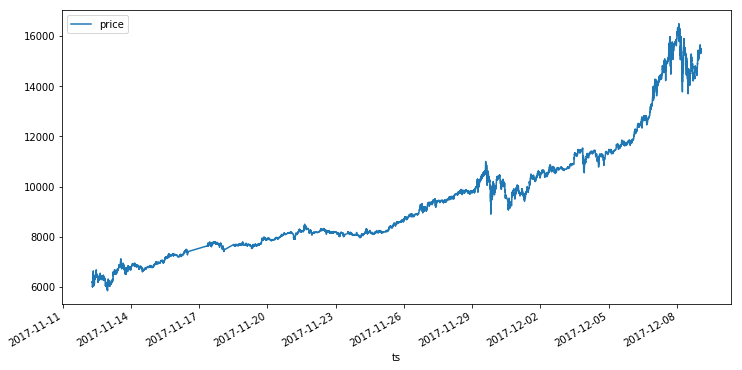

In [133]:
# we take every one of 120 rows from original, and 5000 from this result
df = pd.read_csv('data.csv', sep=",", names=['ts', 'price', 'hz'], skiprows=lambda x: x % 60 != 0)[10000:]
df = df.assign(ts=pd.to_datetime(df.ts, unit='s'))
ax = df.plot(x='ts', y='price', figsize=(12, 6))

# df_trends = pd.read_csv('google.csv', sep=",", names=['date', 'val'])
# t_plot = df_trends.plot(x='date', y='val', figsize=(12, 6))

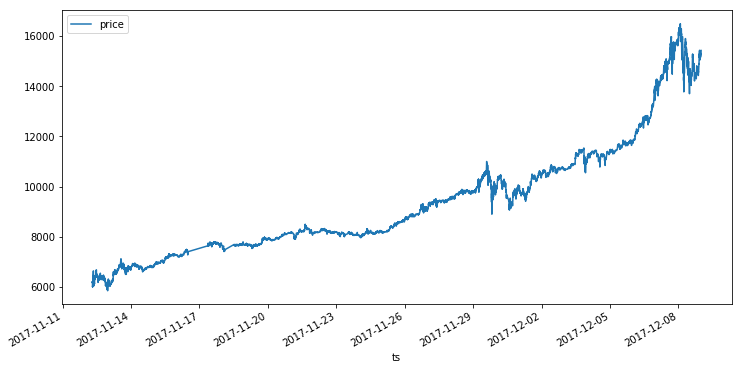

In [134]:
# training data plot
test_data_length = 50

train_df = df[:-test_data_length]
test_df = df[-test_data_length:]
tx = train_df.plot(x='ts', y='price', figsize=(12, 6))

In [135]:
# TODO make this a f(df, win_size) -> X, y
# apply f to train_df & test_df
# y^ = regr.predict(test_features)
# add y^ as column to df (not forget shift first win_size items) -> plt 

def prepare_data(prices, win_size):
    windows = []
    for i in range(len(prices) - win_size):
        windows.append(prices[i:i + win_size])
        
    wx = np.vstack(windows)

    targets = []
    for i in range(len(prices) - win_size):
        targets.append(prices[i + win_size])
        
    tx = np.vstack(targets)

    return wx, tx

In [154]:
regr = linear_model.LinearRegression()

win_size = 100
train_prices = train_df.price.values
train_x, train_t = prepare_data(train_prices, win_size)
train_reg = regr.fit(train_x, train_t)

In [155]:
result_list = []
q = train_prices[-win_size:].tolist()

for i in range(test_data_length):    
    # reger.predict returns 1x1 matrix, [0][0] extracts numeric value
    val = regr.predict([q])[0][0]
    # update the window
    q = q[1:] + [val]
    result_list.append(val)

In [156]:
test_df = test_df.assign(prediction=result_list)

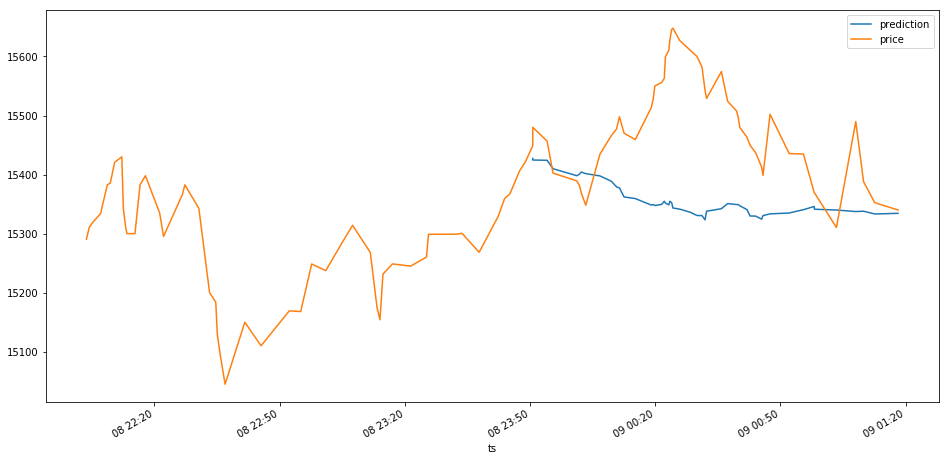

In [157]:
ax = test_df.plot(x='ts', y='prediction')
df[-100:].plot(x='ts', y='price', ax=ax, figsize=(16, 8))

In [140]:
# res_df.plot(x='ts', y='prediction', figsize=(12, 6))
# ax = test_df.plot(x='ts', y='price')
# res_df.plot(x='ts', y='price', ax=ax, figsize=(16, 8))

In [141]:
# pd.merge(
#     test_df.drop('hz', axis=1),
#     res_df, on='ts', how='outer', suffixes=['_test', '_res']
# )[150000:160000].plot(x='ts', figsize=(16, 8))